## RNN model fitting

This notebook contains the fitting of the Recurrent Neural Network with LSTM cells to all series in the dataset at the same time.

In [1]:
import os
import sys
import pickle
import pandas as pd
import matplotlib.pyplot as plt

src_path = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append(src_path)

from RNN.model_selection import RNNHyperTune
from RNN.data_processing import window_dataset
from DataSimulation.utils import plot_fit

In [2]:
data = pd.read_csv('data.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9
0,231.0,234.0,8.0,7.0,3.0,6.0,8.0,863.0,1496.0,4851.0
1,255.0,260.0,7.0,5.0,5.0,5.0,8.0,931.0,1438.0,4849.0
2,244.0,238.0,5.0,4.0,6.0,6.0,7.0,871.0,1412.0,4808.0
3,240.0,229.0,3.0,8.0,6.0,6.0,5.0,882.0,1413.0,4781.0
4,209.0,258.0,7.0,7.0,6.0,5.0,7.0,885.0,1353.0,4796.0


In [3]:
test_size = 4*24
train_data = data.iloc[:-test_size, :].to_numpy()
test_data = data.iloc[-test_size:, :].to_numpy()
print(train_data.shape)
print(test_data.shape)

(904, 10)
(96, 10)


In [4]:
parameters = {
    'lstm_units':[16,32,64],
    'learning_rate':[0.01, 0.001, 0.0001],
    'batch_size':[32,64,128],
}
rnn_hypertune = RNNHyperTune(10, 24, parameters)

In [5]:
rnn_model, scaler = rnn_hypertune.fit(
    data=train_data,
    checkpoint_path=os.path.join(os.getcwd(), 'checkpoint'),
    epochs=500
)

Training model 0/108.
minimum 0 model's validation loss: 0.0242618340998888.
Training model 1/108.
minimum 1 model's validation loss: 0.03263388201594353.
Training model 2/108.
minimum 2 model's validation loss: 0.04554003104567528.
Training model 3/108.
minimum 3 model's validation loss: 0.045797042548656464.
Training model 4/108.
minimum 4 model's validation loss: 0.021258093416690826.
Training model 5/108.
minimum 5 model's validation loss: 0.03398178890347481.
Training model 6/108.
minimum 6 model's validation loss: 0.047704268246889114.
Training model 7/108.
minimum 7 model's validation loss: 0.0429125614464283.
Training model 8/108.
minimum 8 model's validation loss: 0.022058095782995224.
Training model 9/108.
minimum 9 model's validation loss: 0.02760446071624756.
Training model 10/108.
minimum 10 model's validation loss: 0.044085543602705.
Training model 11/108.
minimum 11 model's validation loss: 0.05263044312596321.
Training model 12/108.
minimum 12 model's validation loss: 0

tiempo: 212m, 9.9s

In [6]:
rnn_model.summary()

Model: "sequential_109"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_163 (LSTM)             (None, 24, 16)            1728      
                                                                 
 dense_109 (Dense)           (None, 24, 10)            170       
                                                                 
Total params: 1,898
Trainable params: 1,898
Non-trainable params: 0
_________________________________________________________________


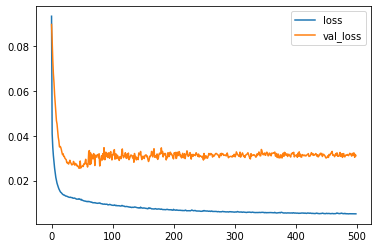

In [7]:
df = pd.DataFrame(rnn_hypertune.history.history)
df.plot(y=['loss', 'val_loss'])
plt.show()

In [8]:
scaled_data = scaler.transform(data)

In [9]:
eval_ds = window_dataset(
    data=scaled_data,
    sequence_lenght=24,
    output_lenght=24,
    batch_size=scaled_data.shape[0],
    shift=1,
    shuffle=False    
)

In [10]:
fit_values = rnn_model.predict(eval_ds)
fit_0 = fit_values[:,0,:]

1/1 [==============================] - 1s 516ms/step


In [11]:
orig_scale = scaler.inverse_transform(fit_0)

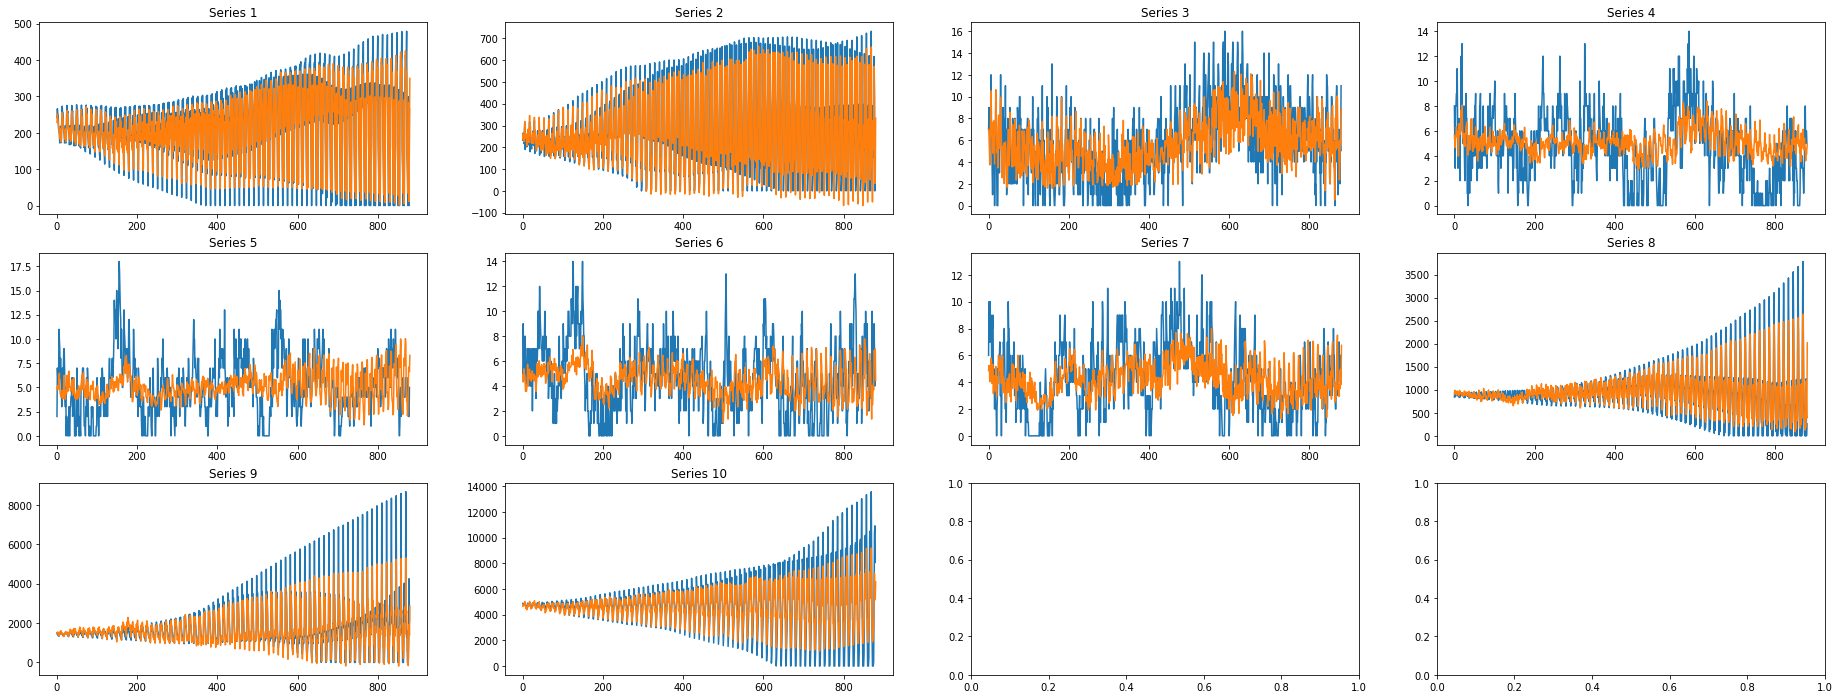

In [12]:
plot_fit(train_data[24:], orig_scale[:-3*24], 2)

In [13]:
rnn_model.save("rnn.h5")

In [14]:
with open("rnn_scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)